In [1]:
# Import libraries (includes special code from Armando) 
import numpy as np
import pandas as pd
import random 

In [2]:
df=pd.read_csv('osptx.csv',parse_dates=True, index_col= 'Date')

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 16:00:00,12097.23,12216.76,11955.94,12208.43,162333312
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296


In [4]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False


<AxesSubplot:xlabel='Date'>

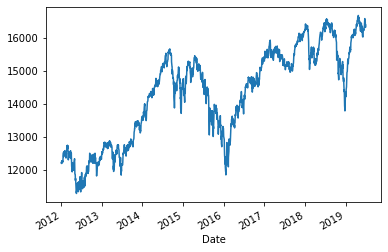

In [5]:
df.Close.plot()

ADF Statistic: -1.556289
p-value:        0.505505 
Lags used:      1
Critical Values:
('1%', -3.4338349685861806)
('5%', -2.8630794170659684)
('10%', -2.5675895289750503)


False

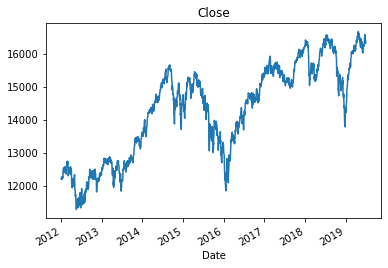

In [6]:
is_stationary(df['Close'])

In [7]:
# Convert to stationary by adding a new column for pct_change 
df['returns'] = df['Close'].pct_change()

ADF Statistic: -20.886771
p-value:        0.000000 
Lags used:      4
Critical Values:
('1%', -3.433842413401391)
('5%', -2.8630827037453277)
('10%', -2.5675912790044446)


True

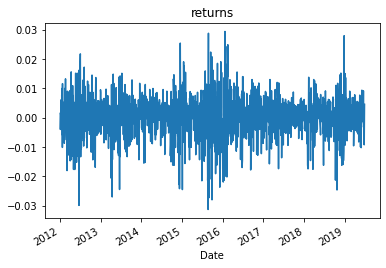

In [8]:
# Drop Nan, do Dickey Fuller test 
df.dropna(inplace=True)
is_stationary(df['returns'])

In [9]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

In [10]:
# Drop Nan then assign to returns 
df.dropna(inplace=True)
returns = df.loc[:, 'returns']
model = ARMA(returns.values, order=(1,1))

C:\Users\Owner\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
results = model.fit()

In [12]:
res = results.forecast(steps=10)

In [13]:
res[0]

array([0.0005331 , 0.00014296, 0.00018428, 0.0001799 , 0.00018036,
       0.00018032, 0.00018032, 0.00018032, 0.00018032, 0.00018032])

In [14]:
df_res = pd.DataFrame(res[0])

<AxesSubplot:>

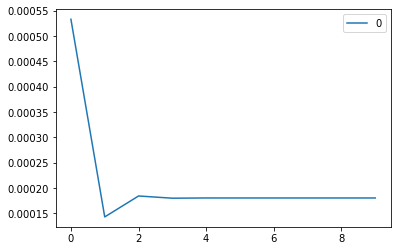

In [15]:
df_res.plot()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1880
Model:                     ARMA(1, 1)   Log Likelihood                6700.067
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 28 Apr 2022   AIC                         -13392.134
Time:                        13:58:11   BIC                         -13369.978
Sample:                             0   HQIC                        -13383.973
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.064      0.288      -0.000       0.001
ar.L1.y       -0.1059      0.278     -0.381      0.703      -0.650       0.439
ma.L1.y        0.1861      0.275      0.678      0.498      -0.352       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.4422           +0.0000j            9.4422            0.5000
MA.1           -5.3744           +0.0000j            5.3744            0.5000
-----------------------------------------------------------------------------
"""